In [16]:
from __future__ import division, print_function
import kf_book.pf_internal as pf_internal
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import uniform
from filterpy.stats import plot_gaussian_pdf
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
from numpy.random import uniform

def create_uniform_particles(x_range, y_range, hdg_range, N):
    particles = np.empty((N, 3))
    particles[:, 0] = uniform(x_range[0], x_range[1], size=N)
    particles[:, 1] = uniform(y_range[0], y_range[1], size=N)
    particles[:, 2] = uniform(hdg_range[0], hdg_range[1], size=N)
    particles[:, 2] %= 2 * np.pi
    return particles

def create_gaussian_particles(mean, std, N):
    particles = np.empty((N, 3))
    particles[:, 0] = mean[0] + (randn(N) * std[0])
    particles[:, 1] = mean[1] + (randn(N) * std[1])
    particles[:, 2] = mean[2] + (randn(N) * std[2])
    particles[:, 2] %= 2 * np.pi
    return particles

In [10]:
########################
##### Predict Step #####
########################

def predict(particles, u, std, dt=1.):
    """ move according to control input u (heading change, velocity)
    with noise Q (std heading change, std velocity)`"""

    N = len(particles)
    # update heading
    particles[:, 2] += u[0] + (randn(N) * std[0])
    particles[:, 2] %= 2 * np.pi

    # move in the (noisy) commanded direction
    dist = (u[1] * dt) + (randn(N) * std[1])
    particles[:, 0] += np.cos(particles[:, 2]) * dist
    particles[:, 1] += np.sin(particles[:, 2]) * dist

In [11]:
#######################
##### Update Step #####
#######################


def update(particles, weights, z, R, landmarks):
    for i, landmark in enumerate(landmarks):
        distance = np.linalg.norm(particles[:, 0:2] - landmark, axis=1)
        weights *= scipy.stats.norm(distance, R).pdf(z[i])

    weights += 1.e-300      # avoid round-off to zero
    weights /= sum(weights) # normalize

In [12]:
#################################
##### State Estimation Step #####
#################################

def estimate(particles, weights):
    """returns mean and variance of the weighted particles"""

    pos = particles[:, 0:2]
    mean = np.average(pos, weights=weights, axis=0)
    var  = np.average((pos - mean)**2, weights=weights, axis=0)
    return mean, var

In [13]:
#############################
#### Particle Resampling ####
#############################

def simple_resample(particles, weights):
    N = len(particles)
    cumulative_sum = np.cumsum(weights)
    cumulative_sum[-1] = 1. # avoid round-off error
    indexes = np.searchsorted(cumulative_sum, random(N))

    # resample according to indexes
    particles[:] = particles[indexes]
    weights.fill(1.0 / N)
    
def resample_from_index(particles, weights, indexes):
    particles[:] = particles[indexes]
    weights[:] = weights[indexes]
    weights.fill(1.0 / len(weights))    

def neff(weights):
    return 1. / np.sum(np.square(weights))

In [24]:
####################################
#### Transition Matrix Training ####
####################################

agenttrace = '../4jul11p.csv'
f = open(simworldname)
#print(f.readlines)
oracle = []
gridized_data = []

xbins = 14
ybins = 22

TMatrix = np.zeros((xbins * ybins, xbins * ybins))

with open(agenttrace, 'r') as user_data:
    reader = csv.reader(user_data, delimiter=',', quotechar=',')
    for row in reader:
        if (reader.line_num > 1):
            oracle.append([row[4], row[5]])

            
for d in oracle:
    #print(d)
    gridized_data.append(np.floor(d[0]/a), np.floor(d[1]/a))

# xedges = [0, 1, 3, 5]
# yedges = [0, 2, 3, 4, 6]

# x = np.random.normal(2, 1, 100)
# y = np.random.normal(1, 1, 100)

# H, xedges, yedges = np.histogram2d(x, y, bins=(xbins, ybins))
# H = H.T

# fig = plt.figure(figsize=(7, 3))
# ax = fig.add_subplot(131, title='imshow: square bins')
# plt.imshow(H, interpolation='nearest', origin='low', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

['2.298139', '5.403299']
['2.298263', '5.403079']
['2.298387', '5.402859']
['2.298511', '5.402639']
['2.298635', '5.402419']
['2.298759', '5.402199']
['2.298883', '5.401979']
['2.299007', '5.40176']
['2.299132', '5.40154']
['2.299256', '5.40132']
['2.299504', '5.40088']
['2.299628', '5.40066']
['2.299752', '5.40044']
['2.299876', '5.40022']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.677778', '5.788889']
['3.055556', '6.177778']
['3.433333', '6.566667']
['3.811111', '6.955556']
['4.188889', '7.344444']
['4.566667', '7.733333']
['4.944444', '8.122222']
['5.322222', '8.511111']
['5.7', '8.9']
['5.7', '8.9']
['5.7', '8.9']
['5.7', '8.9']
['5.7', '8.9']
['5.7', '8.9']
['5.7', '8.9']
['5.7', '8.9']
['5.7', '8.9']
['5.7', '8.9']
['5.7', '8.9']
['5.7', '8.9']
['4', '

['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.4', '7.4']
['6.3', '7.175']
['6.2', '6.95']
['6.1', '6.725']
['6', '6.5']
['6', '6.5']
['6', '6.5']
['6', '6.5']
['6', '6.5']
['6', '6.5']
['6', '6.5']
['6', '6.5']
['6', '6.5']
['6', '6.5']
['6', '4.9']
['6', '4.9']

['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95', '7.1']
['2.95',

['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5

['2.245238', '6.166667']
['2.247619', '6.133333']
['2.25', '6.1']
['2.252381', '6.066667']
['2.254762', '6.033333']
['2.257143', '6']
['2.259524', '5.966667']
['2.261905', '5.933333']
['2.264286', '5.9']
['2.266667', '5.866667']
['2.269048', '5.833333']
['2.271429', '5.8']
['2.27381', '5.766667']
['2.27619', '5.733333']
['2.278571', '5.7']
['2.280952', '5.666667']
['2.283333', '5.633333']
['2.285714', '5.6']
['2.288095', '5.566667']
['2.290476', '5.533333']
['2.292857', '5.5']
['2.295238', '5.466667']
['2.297619', '5.433333']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2.3', '5.4']
['2

['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3.1']
['0.7', '3

array([[0., 0.],
       [0., 0.]])

array([2.39438686, 0.77826403, 3.03283625, 3.52304772, 3.34666124,
       2.39995024, 2.87361974, 0.08984878, 0.93164293, 1.25225768,
       1.90951126, 2.4699721 , 1.15800907, 1.7053442 , 0.46737579,
       0.99560522, 2.79302195, 2.00552921, 1.29190879, 3.44634354,
       2.9578665 , 3.63282878, 3.15081042, 2.810766  , 1.81057707,
       0.32253921, 1.99929623, 1.43225675, 1.30434494, 1.21198466,
       1.39349517, 2.95438888, 2.00709692, 2.13944064, 3.79969531,
       1.97696063, 0.01919019, 1.55927572, 2.04592399, 1.08522687,
       2.96618762, 1.49966122, 1.27613252, 3.97444485, 3.38580295,
       3.14660432, 0.43081561, 2.30287019, 1.85737924, 1.98920447,
       3.09179117, 1.87424855, 2.04854416, 1.99550586, 1.14490559,
       2.30046211, 4.13769383, 1.07217712, 3.02652605, 2.86991606,
       1.99719347, 2.42743424, 0.55850809, 2.7319412 , 2.08564778,
       2.7097796 , 1.43835617, 1.37004996, 2.68827836, 2.5803466 ,
       2.8279139 , 1.51100975, 1.01629295, 3.80558789, 2.26220

In [22]:
from filterpy.monte_carlo import systematic_resample
from numpy.linalg import norm
from numpy.random import randn
import scipy.stats

def run_pf1(N, iters=18, sensor_std_err=.1, do_plot=True, plot_particles=False, xlim=(0, 20), ylim=(0, 20), initial_x=None):
    
    #TODO: (Sensor Model)
    landmarks = np.array([[-1, 2], [5, 10], [12,14], [18,21]])
    NL = len(landmarks)
    plt.figure()
   
    # create particles and weights
    particles = create_uniform_particles((0,20), (0,20), (0, 6.28), N)    
    weights = np.ones(N) / N

    if plot_particles:
        alpha = .20
        if N > 5000:
            alpha *= np.sqrt(5000)/np.sqrt(N)           
        plt.scatter(particles[:, 0], particles[:, 1], 
                    alpha=alpha, color='g')
    
    xs = []
    robot_pos = np.array([0., 0.])
    for x in range(iters):
        #TODO: (Motion Model)
        robot_pos += (1, 1)

        # distance from subject to each landmark
        #TODO: Need to be changed!
        zs = (norm(landmarks - robot_pos, axis=1) + (randn(NL) * sensor_std_err))

        
        # move diagonally forward to (x+1, x+1)
        predict(particles, u=(0.00, 1.414), std=(.2, .05))
        
        # incorporate measurements
        update(particles, weights, z = zs, R = sensor_std_err, landmarks = landmarks)
        
        
        
        
        
        
        
        
        # resample if too few effective particles
        if neff(weights) < N/2:
            indexes = systematic_resample(weights)
            resample_from_index(particles, weights, indexes)
            assert np.allclose(weights, 1/N)
        mu, var = estimate(particles, weights)
        xs.append(mu)

        if plot_particles:
            plt.scatter(particles[:, 0], particles[:, 1], color='k', marker=',', s=1)
        
        p1 = plt.scatter(robot_pos[0], robot_pos[1], marker='+', color='k', s=180, lw=3)
        p2 = plt.scatter(mu[0], mu[1], marker='s', color='r')
    
    xs = np.array(xs)
    #plt.plot(xs[:, 0], xs[:, 1])
    plt.legend([p1, p2], ['Actual', 'PF'], loc=4, numpoints=1)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    print('final position error, variance:\n\t', mu - np.array([iters, iters]), var)
    plt.show()

final position error, variance:
	 [-0.10621456  0.1061402 ] [0.00859646 0.00757081]


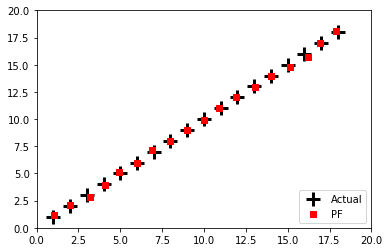

In [23]:
from numpy.random import seed
seed(2) 
run_pf1(N=5000, plot_particles=False)